<a href="https://colab.research.google.com/github/20191CSE0611/DE1_Assignment/blob/main/Airbnb_Berlin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necessary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df=pd.read_csv("/content/airbnb_berlin.csv")
df.head()

,Listing ID,Listing Name,Host ID,Host Name,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,Country Code,Country,Latitude,Longitude,Is Exact Location,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Square Feet,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Price
0,19665213.0,*,156079597.0,Maximilian,2016-01-20,NaN,NaN,f,Prenzlauer Berg,Pankow,Berlin,10437.0,DE,Germany,52.54652,13.41792,t,Apartment,Private room,2,1.0,1.0,1.0,NaN,1,2,6,2017-07-07,2017-08-08,100.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,26.0
1,6436842.0,*,5302290.0,Dulie,2013-04-07,NaN,NaN,f,Pankow,Pankow,Berlin,13187.0,DE,Germany,52.56512,13.42214,t,Apartment,Entire home/apt,2,1.0,2.0,2.0,NaN,2,7,6,2015-05-26,2019-04-30,90.0,9.0,9.0,10.0,10.0,9.0,10.0,f,f,41.0
2,10559468.0,*,59151456.0,Geank,2016-02-07,NaN,NaN,f,Prenzlauer Berg,Pankow,Berlin,10439.0,DE,Germany,52.54741,13.42521,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,NaN,1,1,2,2016-04-19,2016-07-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,50.0
3,27215482.0,*,193452785.0,Alix,2018-06-26,NaN,NaN,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245,DE,Germany,52.50958,13.45144,t,Apartment,Private room,2,1.0,1.0,1.0,NaN,1,2,4,2018-07-31,2018-08-12,100.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,50.0
4,27287546.0,*,205870244.0,Lurina,2013-05-16,within a few hours,92%,t,Prenzlauer Berg,Pankow,Berlin,10405.0,DE,Germany,52.52995,13.41558,t,Apartment,Private room,3,1.0,1.0,2.0,NaN,1,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,55.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15692 entries, 0 to 15691
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Listing ID             15691 non-null  float64
 1   Listing Name           15638 non-null  object 
 2   Host ID                15692 non-null  float64
 3   Host Name              15670 non-null  object 
 4   Host Since             15671 non-null  object 
 5   Host Response Time     8617 non-null   object 
 6   Host Response Rate     8617 non-null   object 
 7   Is Superhost           15669 non-null  object 
 8   neighbourhood          15692 non-null  object 
 9   Neighborhood Group     15692 non-null  object 
 10  City                   15691 non-null  object 
 11  Postal Code            15463 non-null  object 
 12  Country Code           15692 non-null  object 
 13  Country                15692 non-null  object 
 14  Latitude               15692 non-null  float64
 15  Lo

In [ ]:
df.shape

(15692, 39)

In [ ]:
df.columns

Index(['Listing ID', 'Listing Name', 'Host ID', 'Host Name', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Is Superhost',
       'neighbourhood', 'Neighborhood Group', 'City', 'Postal Code',
       'Country Code', 'Country', 'Latitude', 'Longitude', 'Is Exact Location',
       'Property Type', 'Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Square Feet', 'Guests Included', 'Min Nights', 'Reviews',
       'First Review', 'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready', 'Price'],
      dtype='object')

### Data Preprocessing

In [ ]:
for i in df.columns:
  df[i]=df[i].replace('*',np.nan)

##### Dropping Unwanted Columns

In [ ]:
x=['Listing ID', 'Listing Name', 'Host ID', 'Host Name','Host Response Time', 'Host Response Rate', 'neighbourhood','City','Country Code', 'Country','Square Feet','First Review', 'Last Review', 
   'Accuracy Rating','Cleanliness Rating', 'Checkin Rating', 'Communication Rating','Location Rating', 'Value Rating','Business Travel Ready']

In [ ]:
df.drop(x,inplace=True,axis=1)

##### Handling Error in Column Datatype

In [ ]:
#Converting a list of columns from object type to float64
df[['Postal Code', 'Accomodates','Bathrooms','Bedrooms', 'Beds', 'Guests Included', 'Min Nights']]=df[['Postal Code','Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included', 'Min Nights']].astype(float)

In [ ]:
df['Host Since']=pd.to_datetime(df['Host Since'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15692 entries, 0 to 15691
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Host Since          15671 non-null  datetime64[ns]
 1   Is Superhost        15669 non-null  object        
 2   Neighborhood Group  15692 non-null  object        
 3   Postal Code         14593 non-null  float64       
 4   Latitude            15692 non-null  float64       
 5   Longitude           15692 non-null  float64       
 6   Is Exact Location   15692 non-null  object        
 7   Property Type       15617 non-null  object        
 8   Room Type           15692 non-null  object        
 9   Accomodates         15673 non-null  float64       
 10  Bathrooms           15667 non-null  float64       
 11  Bedrooms            15676 non-null  float64       
 12  Beds                15672 non-null  float64       
 13  Guests Included     15682 non-null  float64   

##### Handling Missing Values

In [ ]:
df['Host Since']=pd.to_datetime(df['Host Since'])
df['Host Since']=pd.to_datetime('2021-08-01')-df['Host Since']
df['Host Since']=df['Host Since'].astype(str)
l=[]
for i in df['Host Since']:
  l.append(i[:4])
df['Host Since']=l
df['Host Since'].replace('NaT',np.nan,inplace=True)
df['Host Since']=df['Host Since'].astype(float)
df['Host Since'].fillna(df['Host Since'].mean(),inplace=True)
df['Host Since']=df['Host Since']/365

df['Is Superhost'].fillna('f',inplace=True)
df['Neighborhood Group'].fillna(df['Neighborhood Group'].mode(),inplace=True)
df['Postal Code'].fillna(df['Postal Code'].mean(),inplace=True)
df['Property Type'].fillna('Other',inplace=True)

x=['Accomodates','Bathrooms', 'Bedrooms', 'Beds','Guests Included', 'Min Nights','Overall Rating',]
for i in x:
  df[i].fillna(df[i].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Host Since            0
Is Superhost          0
Neighborhood Group    0
Postal Code           0
Latitude              0
Longitude             0
Is Exact Location     0
Property Type         0
Room Type             0
Accomodates           0
Bathrooms             0
Bedrooms              0
Beds                  0
Guests Included       0
Min Nights            0
Reviews               0
Overall Rating        0
Instant Bookable      0
Price                 9
dtype: int64

In [ ]:
df.dropna(inplace=True)

##### One-Hot Encoding

In [ ]:
#Extracting categorical column names
cat=list(df.select_dtypes(exclude=(np.number)).columns)

In [ ]:
final_df=pd.concat([pd.get_dummies(df[cat]),df],axis=1)

In [ ]:
final_df.reset_index(inplace=True)
final_df.drop('index',axis=1,inplace=True)

In [ ]:
final_df.drop(cat,axis=1,inplace=True)

In [ ]:
final_df.head()

,Is Superhost_f,Is Superhost_t,Neighborhood Group_Charlottenburg-Wilm.,Neighborhood Group_Friedrichshain-Kreuzberg,Neighborhood Group_Lichtenberg,Neighborhood Group_Marzahn - Hellersdorf,Neighborhood Group_Mitte,Neighborhood Group_NeukÃ¶lln,Neighborhood Group_Pankow,Neighborhood Group_Reinickendorf,Neighborhood Group_Spandau,Neighborhood Group_Steglitz - Zehlendorf,Neighborhood Group_Tempelhof - SchÃ¶neberg,Neighborhood Group_Treptow - KÃ¶penick,Is Exact Location_f,Is Exact Location_t,Property Type_Apartment,Property Type_Bed and breakfast,Property Type_Boat,Property Type_Boutique hotel,Property Type_Bungalow,Property Type_Condominium,Property Type_Guest suite,Property Type_Guesthouse,Property Type_Hostel,Property Type_Hotel,Property Type_House,Property Type_Loft,Property Type_Other,Property Type_Serviced apartment,Property Type_Townhouse,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Instant Bookable_f,Instant Bookable_t,Host Since,Postal Code,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Reviews,Overall Rating,Price
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,5.534247,10437.0,52.54652,13.41792,2.0,1.0,1.0,1.0,1.0,2.0,6,100.000000,26.0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,8.323288,13187.0,52.56512,13.42214,2.0,1.0,2.0,2.0,2.0,7.0,6,90.000000,41.0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,5.484932,10439.0,52.54741,13.42521,3.0,1.0,1.0,2.0,1.0,1.0,2,100.000000,50.0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3.101370,10245.0,52.50958,13.45144,2.0,1.0,1.0,1.0,1.0,2.0,4,100.000000,50.0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,8.216438,10405.0,52.52995,13.41558,3.0,1.0,1.0,2.0,1.0,6.0,0,94.717282,55.0


### Exploratory Data Analysis (EDA)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

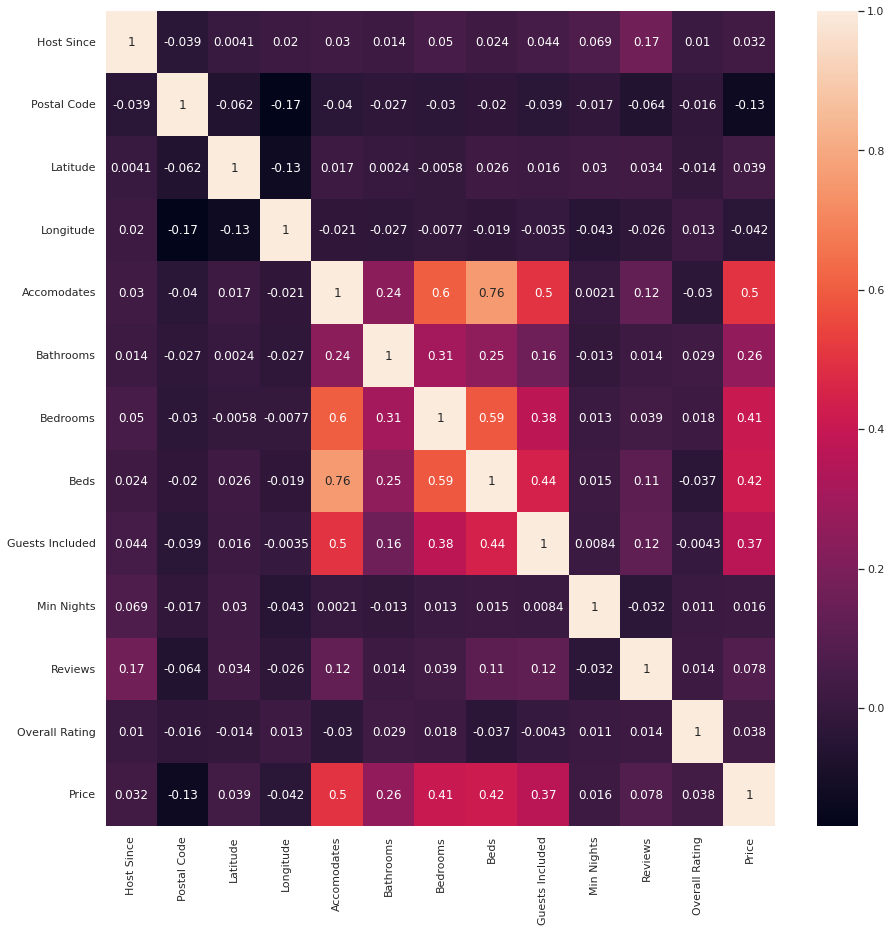

In [ ]:
sns.heatmap(df.corr(),annot=True)
sns.set(rc={'figure.figsize':(15,15)})

- Attributes Accomodates, Bathrooms, Bedrooms, and Beds have high correlation with the target variable Price.
-Attribute Accomodates is highly correlated with Bedrooms,Beds and Guest Included.
- Bedrooms and Beds are highly correlated.

In [ ]:
num=list(df.select_dtypes(include=(np.number)).columns)

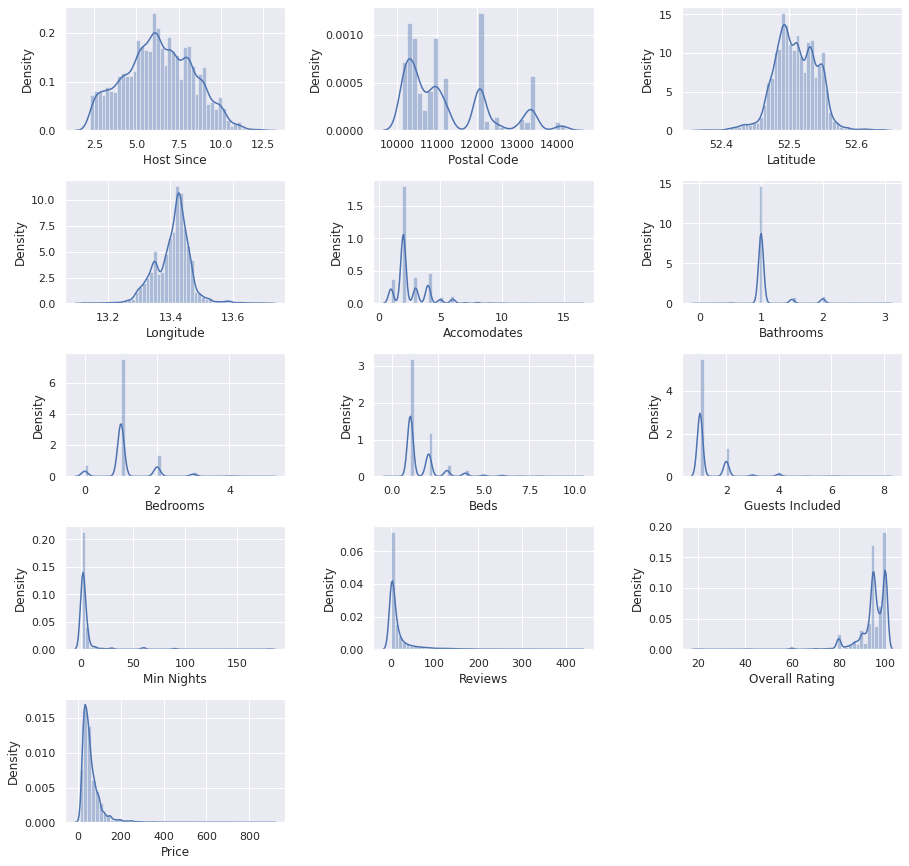

In [ ]:
count=1
plt.subplots(figsize=(15,15))
for i in num:
  plt.subplot(5,3,count)
  sns.distplot(df[i])
  count+=1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

- The Features are skewed.
- The Target Variable is positively skewed, however majority of the property are low priced.

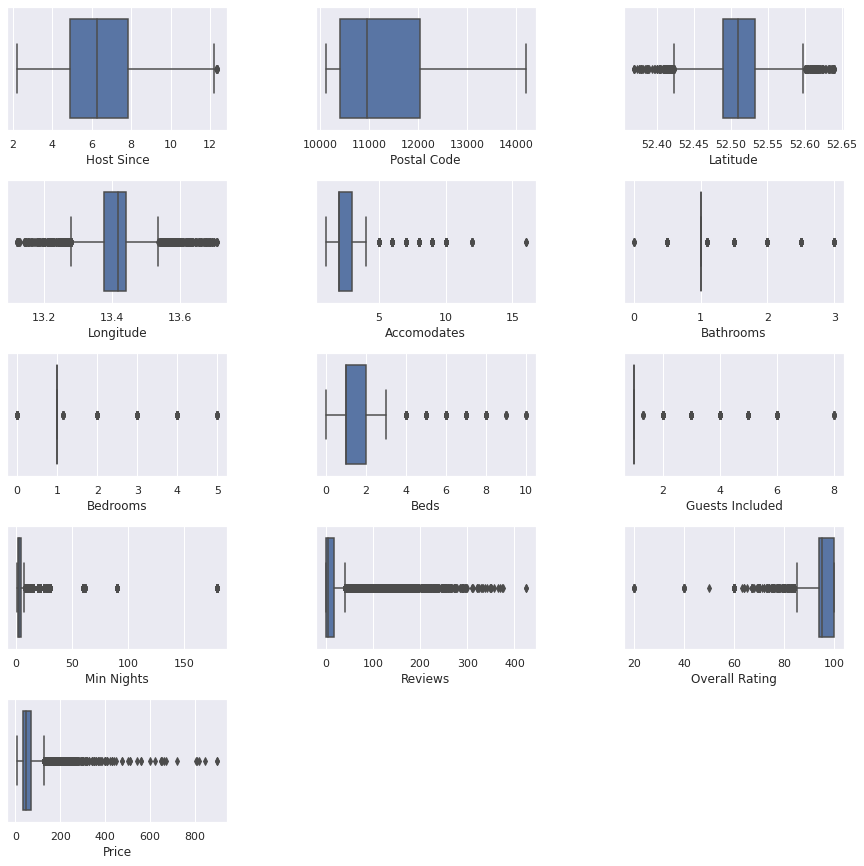

In [ ]:
count=1
plt.subplots(figsize=(15,15))
for i in num:
  plt.subplot(5,3,count)
  sns.boxplot(df[i])
  count+=1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

- There are outliers in almost all the variables.

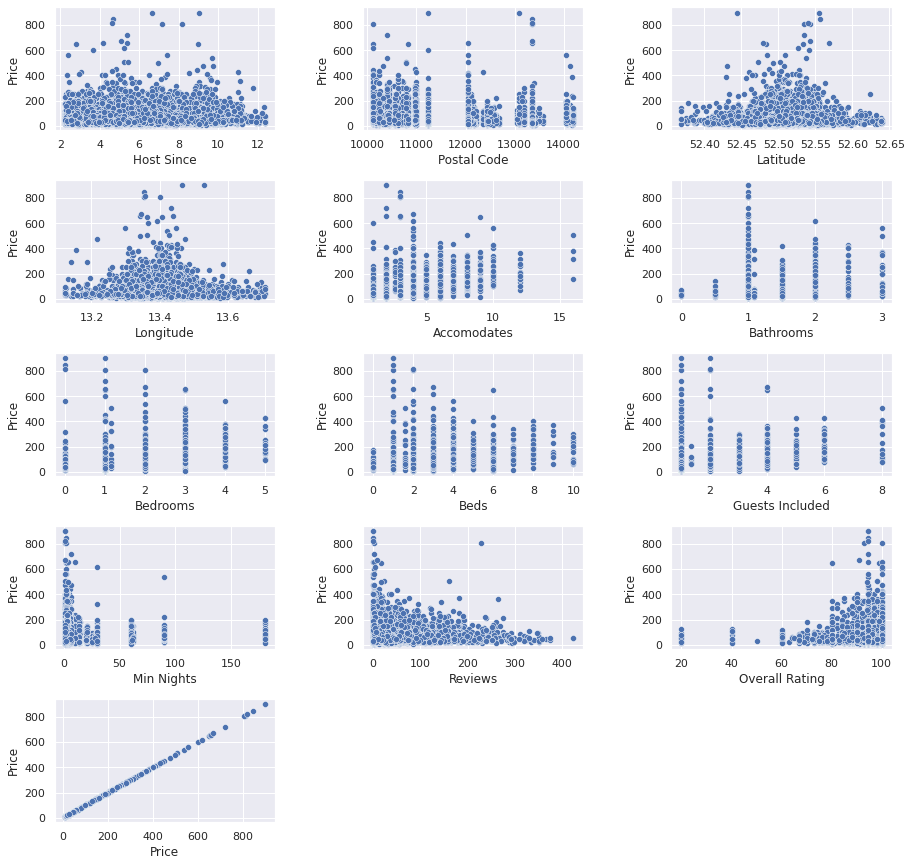

In [ ]:
count=1
plt.subplots(figsize=(15,15))
for i in num:
  plt.subplot(5,3,count)
  sns.scatterplot(x=df[i],y=df['Price'])
  count+=1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

- The variables Reviews and Overall Rating appears to have a linear relationship with Price.
- The varibales Latitude and Longitude appears to have polynomial relation with price. 
- Other variables either don't have a relation with price or relationship isn't strong. 


In [ ]:
for i in cat:
  fig = px.pie(values=df[i].value_counts(),names=df[i].unique(), title=i)
  fig.show()

- Only 15.3% of the Host are tagged as SuperHost
- 73.9% listing have the exact located of the property
- 90.6% of the properties listed are Apartments



### Model Building and Evaluation

In [ ]:
#Splitting the dataframe into features and target variable
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
s=StandardScaler()
train_x=s.fit_transform(train_x)
test_x=s.transform(test_x)

In [ ]:
model=LinearRegression().fit(train_x,train_y)

In [ ]:
train_predict=model.predict(train_x)
test_predict=model.predict(test_x)

In [ ]:
print("Model Performance on Training dataset")
print("R2 Score : ",r2_score(train_y,train_predict))
print("Mean Squared Error : ",mean_squared_error(train_y,train_predict))
print("RMSE : ",np.sqrt(mean_squared_error(train_y,train_predict)))
print("\nModel Performance on Validation/Test dataset")
print("R2 Score : ",r2_score(test_y,test_predict))
print("Mean Squared Error : ",mean_squared_error(test_y,test_predict))
print("RMSE : ",np.sqrt(mean_squared_error(test_y,test_predict)))

Model Performance on Training dataset
R2 Score :  0.3880390178279851
Mean Squared Error :  1469.2855644151844
RMSE :  38.33126092910569

Model Performance on Validation/Test dataset
R2 Score :  0.4143632010064253
Mean Squared Error :  1356.7615401099483
RMSE :  36.834244122961834


In [ ]:
fig=px.scatter(x=test_y, y=test_predict,labels={'x':'Actual Value','y':'Predicted Value'})
fig.show()